In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv', index_col='id')

X = train.copy()
y = train['yield']

#exclude bee-related and 'TRange' data from training data
features_excluded = list(train.columns)[:11]
print(features_excluded)
X.drop(features_excluded, axis=1, inplace=True)
X.drop(['yield'], axis=1, inplace=True)
test.drop(features_excluded, axis=1, inplace=True)

['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange']


In [2]:
X.head()

,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,
0,24.0,0.39,0.425011,0.417545,32.460887
1,24.0,0.39,0.444908,0.422051,33.858317
2,24.0,0.39,0.552927,0.470853,38.341781
3,24.0,0.39,0.565976,0.478137,39.467561
4,24.0,0.39,0.579677,0.494165,40.484512


In [3]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

#determine optimal number of estimators

def mae_score(n_estimators):
    model = XGBRegressor(random_state=1, n_estimators=n_estimators, learning_rate=.04)
    
    score = -1 * cross_val_score(model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
    return score.mean()

trees = [100,150,200,250,300,350,400,500]

results = {}
for i in trees:
    results[i] = mae_score(i)


# mae = mean_absolute_error(predict, y_valid)
# print('MAE: ' + str(mae))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


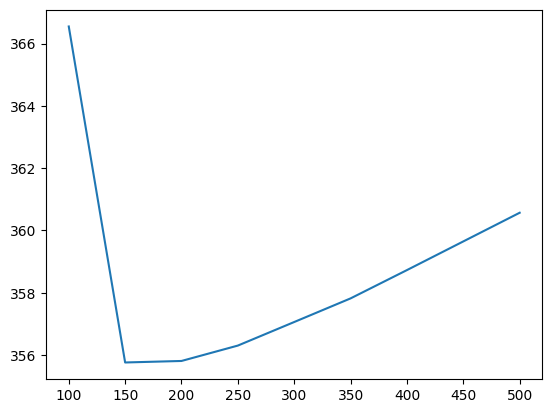

In [4]:
import matplotlib.pyplot as plt


plt.plot(list(results.keys()), list(results.values()))
plt.show()


In [5]:
#fit and predict using optimal number of estimators

final_model = XGBRegressor(random_state=1, n_estimators=175, learning_rate=.04)
final_model.fit(X,y)
prediction = final_model.predict(test)

In [6]:
output = pd.DataFrame({'id': test.index,
                       'yield': prediction})
output.to_csv('submission_1.csv', index=False)